# NOD Coding Image Recognition Project
- **Date:** June 5th, 2023

This project is my first attempt at using Machine Learning to recognize images using the standard ´Fashion-MNIST´ dataset that is a part of the sklearn library.

# Data Preparation

## Libraries

In [196]:
import pandas as pd # manipulation of the dataset
import matplotlib.pyplot as plt # for displaying the images in the dataset
import numpy as np

## Data Import

In [122]:
# Getting the dataset.
from sklearn.datasets import fetch_openml

fmnist = fetch_openml(name='Fashion-MNIST')

c:\Users\james\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [163]:
# Create a DataFrame from the dataset
df = pd.concat([fmnist['data'], fmnist['target']], axis=1)

df.head(1)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


## Exploratory Data Analysis

In [164]:
df.shape

(70000, 785)

- Dataset has 70,000 images
- Each image is 28 x 28 pixels, for a total of 784 columsn.
- Each pixel has a number 0 to 255, representing its grayscale color.

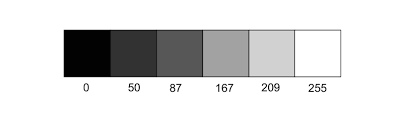

Each of the 70,000 images belongs to one of ten classes.

In [165]:
df['class'].unique()

['9', '0', '3', '2', '7', '5', '1', '6', '4', '8']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

Converting those classes to appropriate labels.

In [166]:
class_labels = {
    0: "T-shirt / Top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Boot"
}

# Convert the 'class' column to a regular column
df['class'] = df['class'].astype(int)

# Map the class labels to class names without getting NA values
df['class'] = df['class'].map(class_labels)

# Convert the 'class' column back to a categorical column
df['class'] = df['class'].astype('category')

df.head(1)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Boot


From here, we can see that we have 7,000 of each type of item.

In [167]:
df['class'].value_counts()

class
Bag              7000
Boot             7000
Coat             7000
Dress            7000
Pullover         7000
Sandal           7000
Shirt            7000
Sneaker          7000
T-shirt / Top    7000
Trouser          7000
Name: count, dtype: int64

### Image Maker Function
This function can be used to convert the pixel data into a black and white image by inserting the index number (0 - 70,000), the dataframe, and which class type.

In [168]:
def image_maker(index, df, class_=None):
    if class_ is not None:
        # Filter the DataFrame based on the provided class value
        df = df[df['class'] == class_].reset_index(drop=True)
    
    # Check if the index is within the valid range of the filtered DataFrame
    if index < 0 or index >= len(df):
        print("Invalid index")
        return
    
    # Access the image data and corresponding label
    image = df.iloc[index, :-1].astype(float)
    label = df.iloc[index, -1]

    # Reshape the image from a flattened array to its original shape (28x28 pixels)
    image = image.values.reshape(28, 28)

    # Get the category name from the DataFrame based on the label
    category_name = df.iloc[index, -1]

    # Display the image with the category name as the title
    plt.imshow(image, cmap='gray')
    plt.title(category_name)
    plt.axis('off')
    plt.show()

### Example Image

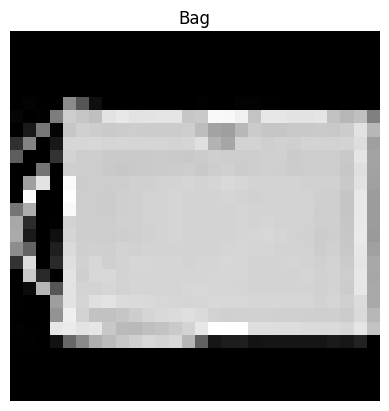

In [169]:
image_maker(1000, df, 'Bag')

## Merging Groups
From the following images, we can see an obvious problem: The resolution of the images is too low, meaning that even for a human, it's difficult to be 100% confident how to classify an item.

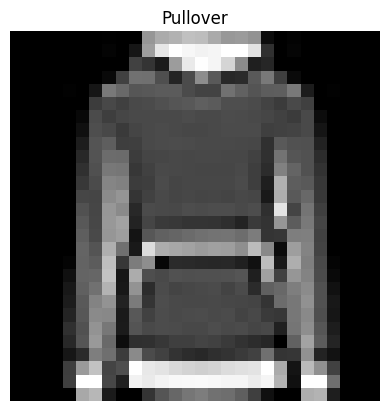

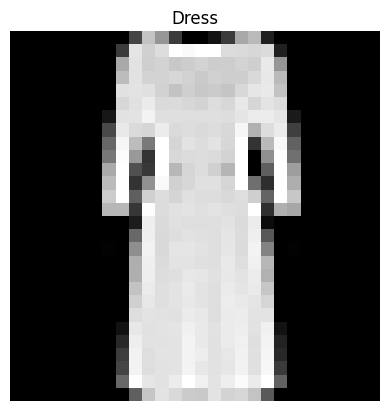

In [170]:
image_maker(1000, df, 'Pullover')
image_maker(1000, df, 'Dress')

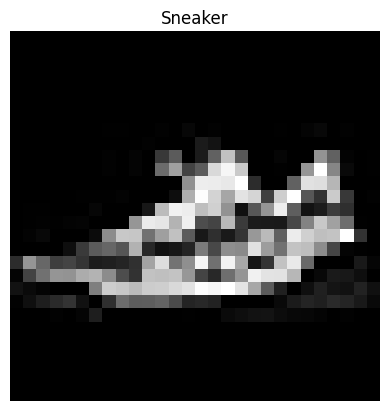

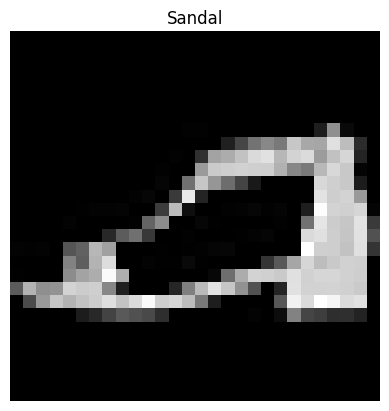

In [171]:
image_maker(800, df, 'Sneaker')
image_maker(900, df, 'Sandal')

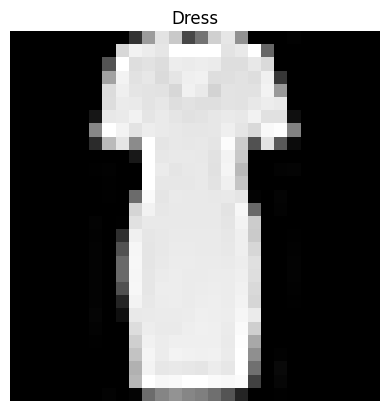

In [172]:
image_maker(900, df, 'Dress')

Because these images are so similar, we have to merge the groups.
- **Boot**, **Sneaker**, **Sandal** will mearge to **Footwear**
- **Coat**, **Pullover**, **T-shirt / Top** , Shirt will merge to **Top**
- **Bag**, **Dress**, and **Trouser** will remain the same.

In [173]:
df['class'].value_counts()

class
Bag              7000
Boot             7000
Coat             7000
Dress            7000
Pullover         7000
Sandal           7000
Shirt            7000
Sneaker          7000
T-shirt / Top    7000
Trouser          7000
Name: count, dtype: int64

In [174]:
new_labels = {
    'Boot': "Footwear",
    'Sneaker': "Footwear",
    'Sandal': "Footwear",
    'Coat': "Top",
    'Pullover': "Top",
    'T-shirt / Top': "Top",
    'Shirt': 'Top',
    'Bag': 'Bag',
    'Dress': 'Dress',
    'Trouser': 'Trouser'
}

# Map the class labels to class names.
df['class'] = df['class'].map(new_labels)

Now we have the five new groups.

In [175]:
df['class'].value_counts()

class
Top         28000
Footwear    21000
Dress        7000
Trouser      7000
Bag          7000
Name: count, dtype: int64

In [176]:
df['class'].isna().value_counts()

class
False    70000
Name: count, dtype: int64

In [177]:
df.sample(10)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
17250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,130.0,202.0,110.0,0.0,0.0,0.0,0.0,Top
30433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,112.0,112.0,105.0,142.0,15.0,0.0,0.0,0.0,0.0,Bag
68668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Footwear
54840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151.0,...,4.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,Top
3954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dress
12803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,Top
40735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,98.0,13.0,0.0,0.0,0.0,0.0,Top
66933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,182.0,185.0,114.0,0.0,0.0,0.0,Top
51984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Footwear
60520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,...,0.0,0.0,103.0,117.0,109.0,43.0,0.0,0.0,0.0,Top


# Model Building

## Imports

In [188]:
# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Models Considered
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Pipeline
from sklearn.pipeline import make_pipeline

# Reporting
from sklearn.metrics import confusion_matrix, classification_report

## Feature Selection
Not much to consider here.
- The features will be the 784 pixels of the image.
- The target will be the type of clothing.

In [179]:
X = df.copy()
y = X.pop('class')

## Preliminary Model Selection
There are a lot of images in this dataset and this is not a powerful laptop, so I'm going to eliminate the obviously bad models by using a training set only 10% of the total dataset size (7000 items).

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1)

classifiers = [RandomForestClassifier(n_jobs=-1), 
               LogisticRegression(n_jobs=-1),  
               MLPClassifier(max_iter=500), 
               SVC(),
               KNeighborsClassifier()]

for classifier in classifiers:

    pipe = make_pipeline(MinMaxScaler(), 
                         classifier)
    
    grid = GridSearchCV(pipe, 
                        cv=3, 
                        scoring='accuracy', 
                        param_grid={},
                        verbose=3)
    
    grid.fit(X_train, y_train)
    score = grid.best_score_

    print(f"{classifier} ACCURACY: {score * 100}%\n")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END ..................................., score=0.957 total time=   4.3s
[CV 2/3] END ..................................., score=0.961 total time=   1.4s
[CV 3/3] END ..................................., score=0.962 total time=   1.6s
RandomForestClassifier(n_jobs=-1) ACCURACY: 96.02861615804339%

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END ..................................., score=0.950 total time=   2.1s
[CV 2/3] END ..................................., score=0.954 total time=   2.1s
[CV 3/3] END ..................................., score=0.957 total time=   2.1s
LogisticRegression(n_jobs=-1) ACCURACY: 95.35719572131312%

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END ..................................., score=0.957 total time=  13.4s
[CV 2/3] END ..................................., score=0.963 total time=  15.5s
[CV 3/3] END ..................................., s

## Preliminary Model Selection II
Though **MLPClassifier** had the highest score, it was very computatinally expensive. Trying again with **SVC** and **RandomForestClassifier** which also have a high accuracy, but require less computational power.

Increasing training size to 0.25.

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.25)

classifiers = [RandomForestClassifier(n_jobs=-1), 
               SVC()]

for classifier in classifiers:

    pipe = make_pipeline(MinMaxScaler(), 
                         classifier)
    
    grid = GridSearchCV(pipe, 
                        cv=3, 
                        scoring='accuracy', 
                        param_grid={},
                        verbose=3)
    
    grid.fit(X_train, y_train)
    score = grid.best_score_

    print(f"{classifier} ACCURACY: {score * 100}%\n")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END ..................................., score=0.965 total time=   5.1s
[CV 2/3] END ..................................., score=0.965 total time=   3.5s
[CV 3/3] END ..................................., score=0.964 total time=   3.4s
RandomForestClassifier(n_jobs=-1) ACCURACY: 96.44571295645612%

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END ..................................., score=0.963 total time=  13.6s
[CV 2/3] END ..................................., score=0.963 total time=  13.0s
[CV 3/3] END ..................................., score=0.968 total time=  14.1s
SVC() ACCURACY: 96.47429287452502%



## Hyper Parameter Tuning with Random Forest
The results between Random Forest and SVC  are pretty similar, but Random Forest is way faster.

In [182]:
param_grid = {
    'randomforestclassifier__n_estimators': [100],  # Number of trees in the forest
    'randomforestclassifier__max_depth': [5, 10],  # Maximum depth of each tree
    'randomforestclassifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
}

pipe = make_pipeline(MinMaxScaler(), RandomForestClassifier())
grid = GridSearchCV(pipe, param_grid=param_grid, scoring='accuracy', cv=3, verbose=3)
grid.fit(X_train, y_train)

print("Best Score:", grid.best_score_)
print("Best Params:", grid.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.935 total time=   4.1s
[CV 2/3] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.930 total time=   3.9s
[CV 3/3] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100;, score=0.933 total time=   3.9s
[CV 1/3] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100;, score=0.934 total time=   3.9s
[CV 2/3] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=100;, score=0.931 total time=   3.9s
[CV 3/3] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_split=5, 

## Training Results

In [185]:
# Full 80% of Data (had to slowly increase due to the computing power problem)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80)

In [186]:
best_model = make_pipeline(MinMaxScaler(), RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=100))
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_train)

In [189]:
# Calculate the confusion matrix
cm = confusion_matrix(y_train, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 5385     7    25   135     0]
 [    1  4784     0   869     0]
 [    9     0 16785     4     0]
 [   27   269     1 22073     2]
 [    1   105     1   114  5403]]


In [190]:
# Print the classification report
report = classification_report(y_train, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         Bag       0.99      0.97      0.98      5552
       Dress       0.93      0.85      0.88      5654
    Footwear       1.00      1.00      1.00     16798
         Top       0.95      0.99      0.97     22372
     Trouser       1.00      0.96      0.98      5624

    accuracy                           0.97     56000
   macro avg       0.97      0.95      0.96     56000
weighted avg       0.97      0.97      0.97     56000



## Test Results

In [192]:
best_model.fit(X_test, y_test)
y_pred = best_model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

# Print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Confusion Matrix:
[[1421    0   10   17    0]
 [   0 1180    0  166    0]
 [   1    0 4198    3    0]
 [   4   43    0 5581    0]
 [   0   27    0   30 1319]]
Classification Report:
              precision    recall  f1-score   support

         Bag       1.00      0.98      0.99      1448
       Dress       0.94      0.88      0.91      1346
    Footwear       1.00      1.00      1.00      4202
         Top       0.96      0.99      0.98      5628
     Trouser       1.00      0.96      0.98      1376

    accuracy                           0.98     14000
   macro avg       0.98      0.96      0.97     14000
weighted avg       0.98      0.98      0.98     14000



## Comparing Predicted vs. True Values

In [195]:
# Get the predicted probabilities for each class
proba = best_model.predict_proba(X_test)

# Create a DataFrame with the predicted labels and probabilities
predictions = pd.DataFrame(y_pred, columns=['Predicted'], index=y_test.index)
predictions['True'] = y_test
predictions['Probability'] = np.max(proba, axis=1)

predictions

,Predicted,True,Probability
49806,Top,Top,0.975124
18675,Top,Top,0.969732
37106,Footwear,Footwear,0.997452
33752,Bag,Bag,0.917783
44298,Trouser,Trouser,0.879992
...,...,...,...
12440,Top,Top,0.983173
26507,Top,Top,0.982983
45589,Top,Top,0.982983
26458,Footwear,Footwear,0.998151


In [212]:
incorrect_predictions = predictions.loc[predictions['Predicted'] != predictions['True']]

In [213]:
incorrect_predictions.sample(5)

,Predicted,True,Probability
46341,Top,Dress,0.479942
31309,Dress,Trouser,0.487622
34381,Dress,Top,0.811968
55239,Dress,Top,0.481748
15752,Top,Bag,0.902969


Let's see the images of what the computer got wrong. I think we will see that even for a human, it would be hard to differentiate.

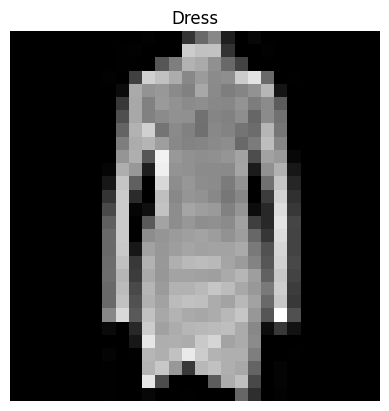

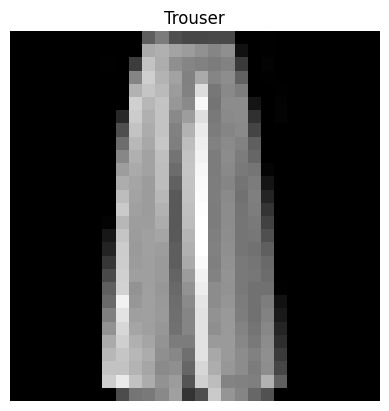

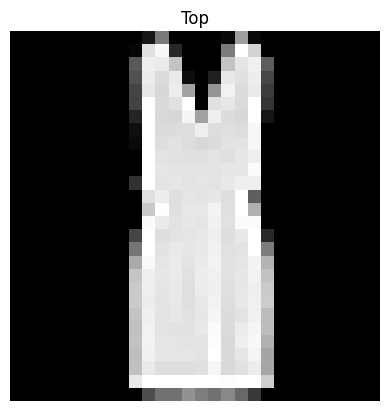

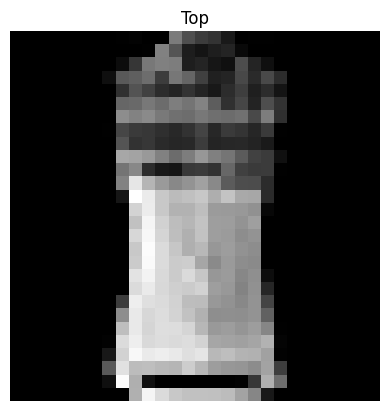

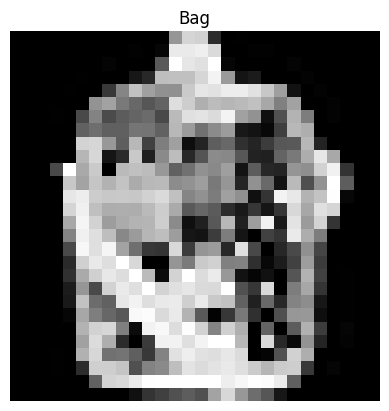

In [215]:
image_maker(46341, df)
image_maker(31309, df)
image_maker(34381, df)
image_maker(55239, df)
image_maker(15752, df)